In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [34]:
def f(x):
    return 1 + np.sin(6 * (x - 2))

def noisy_f(x):
    noise = np.random.normal(0, 0.3)
    return noise + f(x)

In [35]:
# Generate data
D = [noisy_f(x) for x in np.linspace(0, 1, 10)]
T = [noisy_f(x) for x in np.linspace(0, 1, 100)]
print(D)

[1.2367547820148923, 2.1238112557927473, 2.126401515717208, 1.423774460377994, 1.20797735491405, 0.61659086880438374, 0.14036022642556828, -0.36297483629894201, 0.62857088228039404, 1.0094512767995476]


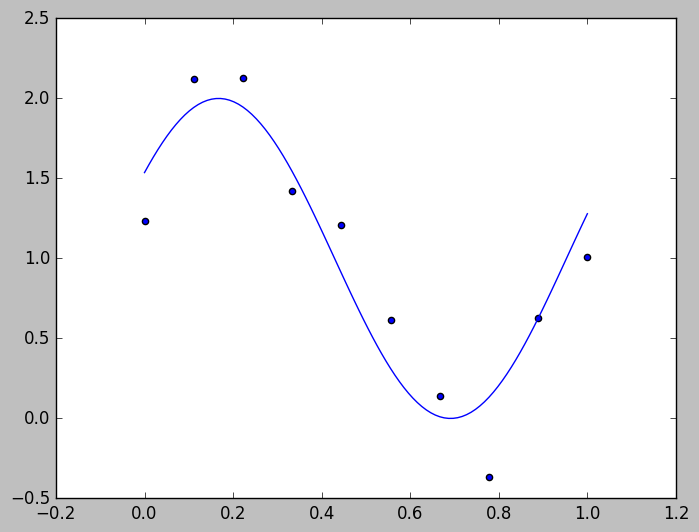

In [36]:
plt.scatter(np.linspace(0, 1, 10), D)
X = np.linspace(0, 1, 100)
y = [f(x) for x in X]
plt.plot(X, y)
plt.savefig('sin_d.png')
plt.show()

In [37]:
def pol_cur_fit(D, M):
    x = D[0, :]
    t = D[1, :]
    A = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            A[i, j] = np.sum(x ** (i+j))
    T = np.zeros(M)
    for i in range(M):
        T[i] = np.sum(t * x**i)
    w = np.linalg.solve(A, T)
    return w

In [38]:
N = 10
N_test = 10
D = [noisy_f(x) for x in np.linspace(0, 1, N)]
T = [noisy_f(x) for x in np.linspace(0, 1, N_test)]
training_data = np.vstack((np.linspace(0, 1, N), D))
test_data = np.vstack((np.linspace(0, 1, N_test), T))

def polynomial(X, w):
    return np.polyval(list(reversed(w)), X)

def RMSE(observed, target):
    error = 0.5 * np.sum((observed - target)**2)
    return np.sqrt(2*error / len(observed))

In [39]:
X = np.linspace(0, 1, 100)
for m in range(10):
    w = pol_cur_fit(training_data, m)
    fitted_curve = polynomial(X, w)
    
    rms_train = RMSE(polynomial(training_data[0, :], w), training_data[1, :])
    rms_test = RMSE(polynomial(test_data[0, :], w), test_data[1, :])
    
    plt.plot(X, fitted_curve, 'b', label='Fitted Curve')
    plt.plot(X, y, 'r', label='True function')
    plt.scatter(training_data[0, :], training_data[1, :], c='g', label='Noisy observations')
    plt.title('M=%d: train RMSE=%.2f, test RMSE=%.2f' % (m, rms_train, rms_test))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend()
    plt.savefig('images/fit_m%d_n_%d.png' % (m, training_data.shape[1]))
    plt.show()




ValueError: operands could not be broadcast together with shapes (10,) (0,) 

In [73]:
def pol_cur_fit_reg(D, M, l=0.01):
    x = D[0, :]
    t = D[1, :]
    A = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            A[i, j] = np.sum(x ** (i+j))
    A += l * np.identity(M)
    T = np.zeros(M)
    for i in range(M):
        T[i] = np.sum(t * x**i)
    w = np.linalg.solve(A, T)
    return w

regularized w: []
nonreg w: []


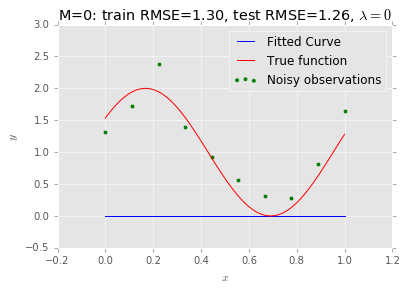

regularized w: [ 1.13526689]
nonreg w: [ 1.13526689]


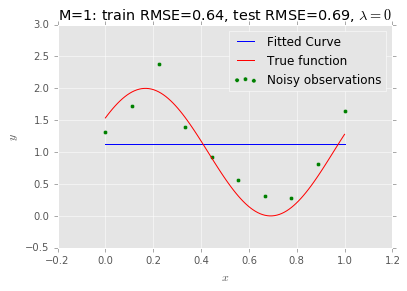

regularized w: [ 1.6104561  -0.95037842]
nonreg w: [ 1.6104561  -0.95037842]


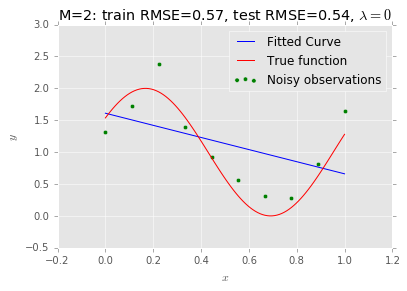

regularized w: [ 2.02383421 -3.74068067  2.79030224]
nonreg w: [ 2.02383421 -3.74068067  2.79030224]


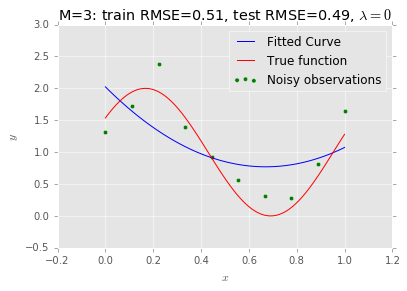

regularized w: [  1.34886733   7.37216695 -26.4984393   19.52582769]
nonreg w: [  1.34886733   7.37216695 -26.4984393   19.52582769]


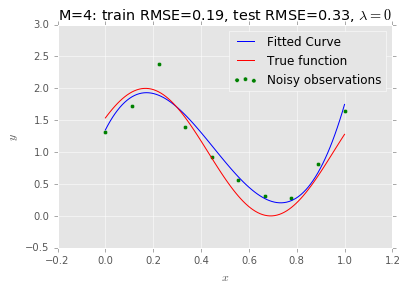

regularized w: [  1.24982247  11.08634907 -45.255059    49.61070286 -15.04243758]
nonreg w: [  1.24982247  11.08634907 -45.255059    49.61070286 -15.04243758]


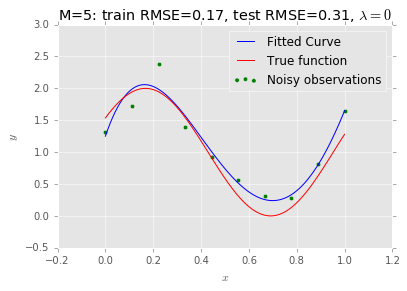

regularized w: [  1.2581387   10.32874002 -38.93991775  31.75990359   5.41862007
  -8.18442306]
nonreg w: [  1.2581387   10.32874002 -38.93991775  31.75990359   5.41862007
  -8.18442306]


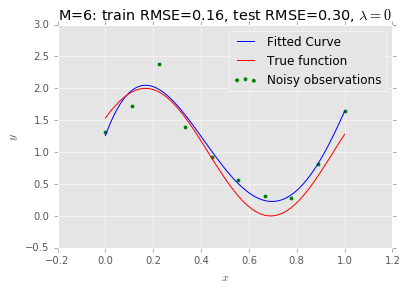

regularized w: [   1.28499114    3.16316875   49.46365628 -348.73736836  740.72042215
 -662.24822239  218.02126644]
nonreg w: [   1.28499114    3.16316875   49.46365628 -348.73736836  740.72042215
 -662.24822239  218.02126644]


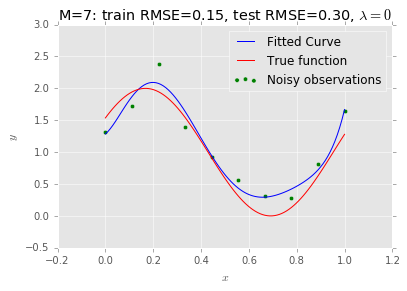

regularized w: [  1.30645794e+00  -2.00514955e+01   4.32523787e+02  -2.62032771e+03
   7.16378072e+03  -1.00289422e+04   7.01549112e+03  -1.94213424e+03]
nonreg w: [  1.30645794e+00  -2.00514955e+01   4.32523787e+02  -2.62032771e+03
   7.16378072e+03  -1.00289422e+04   7.01549112e+03  -1.94213424e+03]


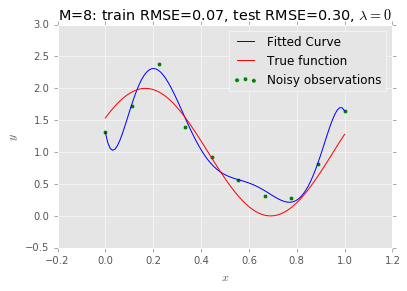

regularized w: [  1.31037416e+00  -4.80786478e+01   9.97731481e+02  -6.88345185e+03
   2.32461815e+04  -4.35109559e+04   4.60778414e+04  -2.58578594e+04
   5.97893139e+03]
nonreg w: [  1.31037416e+00  -4.80786478e+01   9.97731481e+02  -6.88345185e+03
   2.32461815e+04  -4.35109559e+04   4.60778414e+04  -2.58578594e+04
   5.97893139e+03]


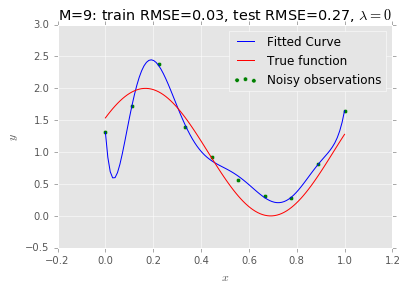

In [112]:
X = np.linspace(0, 1, 100)
l = 0.0
for m in range(10):
    w = pol_cur_fit_reg(training_data, m, l=l)
    w_noreg = pol_cur_fit(training_data, m)
    print('regularized w:', w)
    print('nonreg w:', w_noreg)
    fitted_curve = polynomial(X, w)
    
    rms_train = RMSE(polynomial(training_data[0, :], w), training_data[1, :])
    rms_test = RMSE(polynomial(test_data[0, :], w), test_data[1, :])
    
    plt.plot(X, fitted_curve, 'b', label='Fitted Curve')
    plt.plot(X, y, 'r', label='True function')
    plt.scatter(training_data[0, :], training_data[1, :], c='g', label='Noisy observations')
    plt.title(r'M=%d: train RMSE=%.2f, test RMSE=%.2f, $\lambda=%.1g$' % (m, rms_train, rms_test, l))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend()
    plt.savefig('images/fit_m%d_n_%d_reg.png' % (m, training_data.shape[1]))
    plt.show()

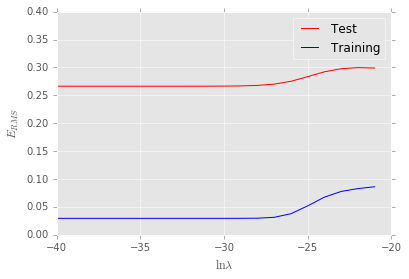

In [117]:
ls = np.arange(-40, -20)
exp_l = np.exp(ls)
errors_train = []
errors_test = []
for l in exp_l:
    w = pol_cur_fit_reg(training_data, 9, l=l)
    rms_train = RMSE(polynomial(training_data[0, :], w), training_data[1, :])
    rms_test = RMSE(polynomial(test_data[0, :], w), test_data[1, :])
    errors_train.append(rms_train)
    errors_test.append(rms_test)

plt.plot(ls, errors_test, 'r', label='Test')
plt.plot(ls, errors_train, 'b', label='Training')
plt.ylim([0, 0.4])
plt.legend()
plt.xlabel(r'$\ln {\lambda}$')
plt.ylabel(r'$E_{RMS}}$')
plt.show()

In [2]:
def h(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

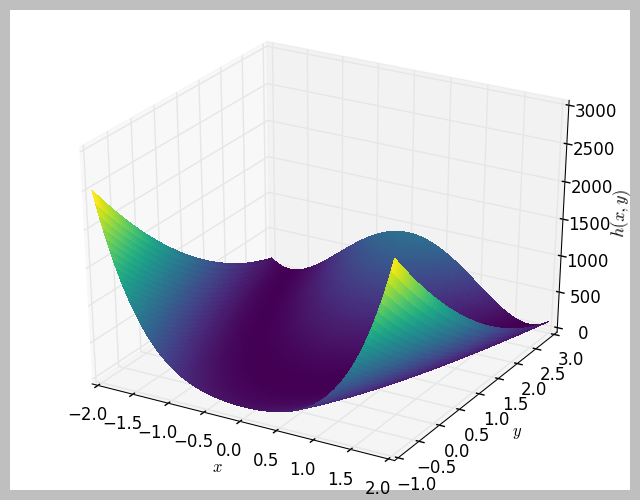

In [30]:
X = np.linspace(-2, 2, 100)
Y = np.linspace(-1, 3, 100)
[x, y] = np.meshgrid(X, Y)
z = h(x, y)

plt.style.use('classic')
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=plt.cm.viridis, linewidth=0, antialiased=False)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$h(x, y)$')
plt.show()

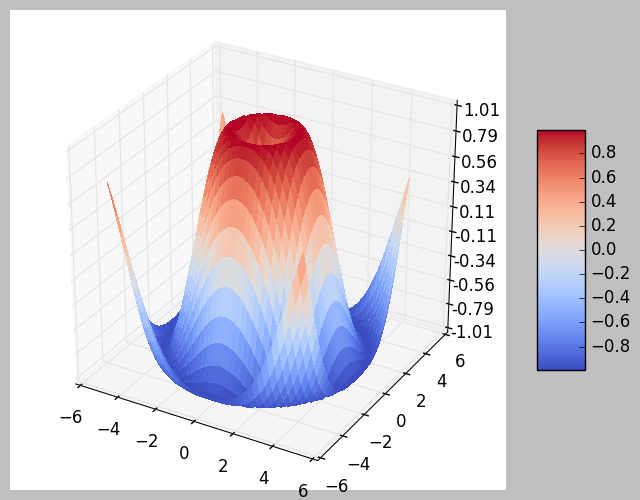